# Introduction:

Financial institutions incur significant losses due to the default of loan vehicle. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default.

Following Information regarding the loan and loanee are provided. Loanee Information (data like age, income, Identity proof etc.). Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.) Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

In this case, we use basic EDA(Exploratory Data Analysis) and EDA is all about making sense of data in hand,before getting them dirty with it. We have to classify that how we can control this significant losses due to default of loan vehicle. We uses different classification models i.e. (Random Forest, Decision Tree and etc.) to classify on the bases of data to predict the defaulter or not. 

In the result, Random forest Scores the highest training accuracy score in different classification models.

# Importing Libraries



In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("F:/data/data.csv")
test  = pd.read_csv("F:/data/archive/test.csv")
train.head(5).T

,0,1,2,3,4
UNIQUEID,420825,537409,417566,624493,539055
DISBURSED_AMOUNT,50578,47145,53278,57513,52378
ASSET_COST,58400,65550,61360,66113,60300
LTV,89.55,73.23,89.63,88.48,88.39
BRANCH_ID,67,67,67,67,67
SUPPLIER_ID,22807,22807,22807,22807,22807
MANUFACTURER_ID,45,45,45,45,45
CURRENT_PINCODE_ID,1441,1502,1497,1501,1495
DATE_OF_BIRTH,01-01-1984,31-07-1985,24-08-1985,30-12-1993,09-12-1977
EMPLOYMENT_TYPE,Salaried,Self employed,Self employed,Self employed,Self employed


# Exploratory Data Analysis (EDA)
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is a good practice to understand the data first and try to gather as many insights from it. 


# Info() method
This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

# Shape 
Return a tuple representing the dimensional of the DataFrame.

In [4]:
train.shape

(233154, 41)

# Describe() method
Used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output

In [5]:
train.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [6]:
train.describe(include=['object'])

,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
count,233154,225493,233154,233154,233154,233154
unique,15433,2,84,20,192,294
top,01-01-1988,Self employed,31-10-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,127635,8826,116950,119373,119127


In [7]:
train.describe(include=['float64'])

,LTV
count,233154.000000
mean,74.746530
std,11.456636
min,10.030000
25%,68.880000
50%,76.800000
75%,83.670000
max,95.000000


In [8]:
train.describe(include=['int64'])

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000



# Corr() method
Compute pairwise correlation of columns, excluding NA/null values.

In [9]:
train.corr()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
DISBURSED_AMOUNT,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
ASSET_COST,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
LTV,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
BRANCH_ID,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
SUPPLIER_ID,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
MANUFACTURER_ID,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
CURRENT_PINCODE_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
STATE_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075
EMPLOYEE_CODE_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,-0.006537,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657



# Importing Libraries

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import re

<AxesSubplot:>

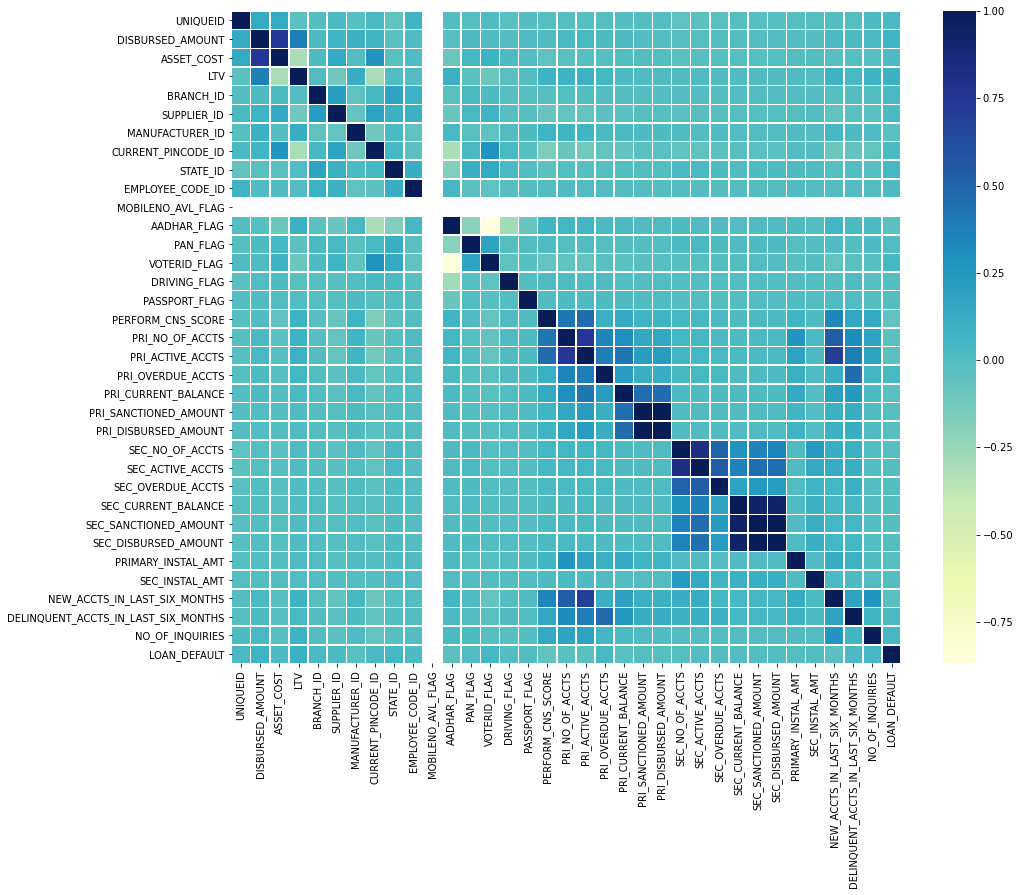

In [11]:
correlation = train.corr()
fig,axis = plt.subplots(figsize = (15,12))
sns.heatmap(correlation, linewidths=.5, cmap = "YlGnBu")

# Dealing with Missing Data

In [12]:
not_missing_data_train = train.isnull()
for column in not_missing_data_train.columns.values.tolist():
    print(column)
    print (not_missing_data_train[column].value_counts())
    print(" ")  
    

UNIQUEID
False    233154
Name: UNIQUEID, dtype: int64
 
DISBURSED_AMOUNT
False    233154
Name: DISBURSED_AMOUNT, dtype: int64
 
ASSET_COST
False    233154
Name: ASSET_COST, dtype: int64
 
LTV
False    233154
Name: LTV, dtype: int64
 
BRANCH_ID
False    233154
Name: BRANCH_ID, dtype: int64
 
SUPPLIER_ID
False    233154
Name: SUPPLIER_ID, dtype: int64
 
MANUFACTURER_ID
False    233154
Name: MANUFACTURER_ID, dtype: int64
 
CURRENT_PINCODE_ID
False    233154
Name: CURRENT_PINCODE_ID, dtype: int64
 
DATE_OF_BIRTH
False    233154
Name: DATE_OF_BIRTH, dtype: int64
 
EMPLOYMENT_TYPE
False    225493
True       7661
Name: EMPLOYMENT_TYPE, dtype: int64
 
DISBURSAL_DATE
False    233154
Name: DISBURSAL_DATE, dtype: int64
 
STATE_ID
False    233154
Name: STATE_ID, dtype: int64
 
EMPLOYEE_CODE_ID
False    233154
Name: EMPLOYEE_CODE_ID, dtype: int64
 
MOBILENO_AVL_FLAG
False    233154
Name: MOBILENO_AVL_FLAG, dtype: int64
 
AADHAR_FLAG
False    233154
Name: AADHAR_FLAG, dtype: int64
 
PAN_FLAG
False  

In [13]:
train['EMPLOYMENT_TYPE'].fillna('Self employed', inplace = True)

In [14]:
test['EMPLOYMENT_TYPE'].fillna('Self employed', inplace = True)

# Data Visualization

Data visualization is the representation of data or information in a graph, chart, or other visual format. It communicates relationships of the data with images. This is important because it allows trends and patterns to be more easily seen. With the rise of big data upon us, we need to be able to interpret increasingly larger batches of data. Machine learning makes it easier to conduct analyses such as predictive analysis, which can then serve as helpful visualizations to present. But data visualization is not only important for data scientists and data analysts, it is necessary to understand data visualization in any career. Whether you work in finance, marketing, tech, design, or anything else, you need to visualize data. That fact showcases the importance of data visualization.



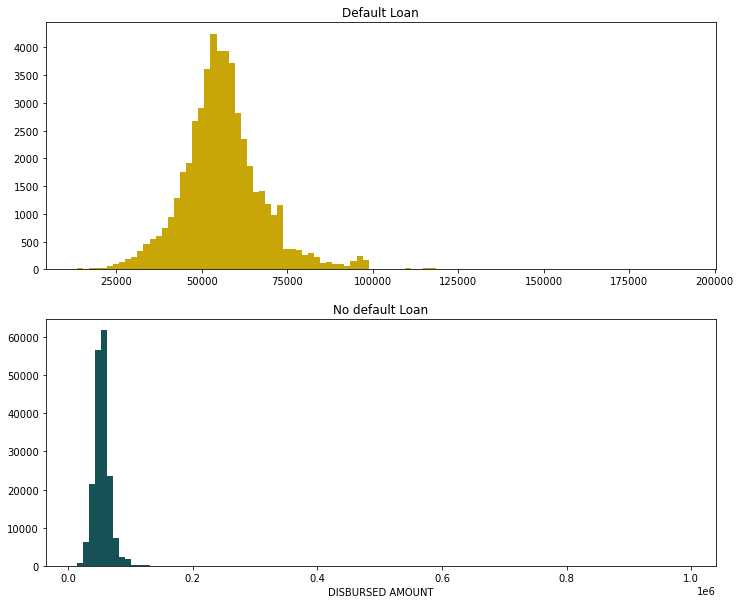

In [15]:
figure,(axis_one, axis_two) = plt.subplots(2, figsize=(12,10))
bins = 100
axis_one.hist(train.DISBURSED_AMOUNT[train.LOAN_DEFAULT == 1], bins = bins, color = '#c9a608')
axis_one.set_title('Default Loan')
axis_two.hist(train.DISBURSED_AMOUNT[train.LOAN_DEFAULT == 0], bins = bins, color = '#165156')
axis_two.set_title('No default Loan')
plt.xlabel('DISBURSED AMOUNT')
plt.show()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64

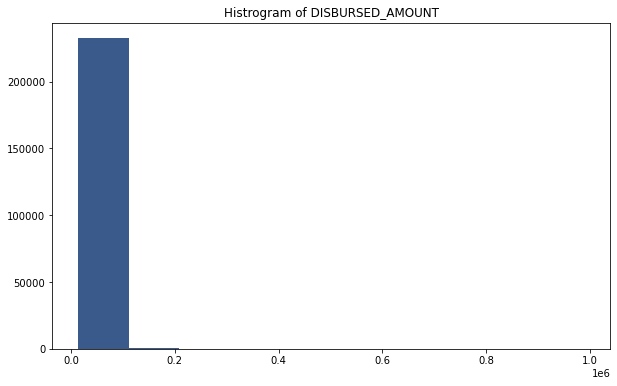

In [16]:
plt.figure(figsize=(10,6))
plt.title("Histrogram of DISBURSED_AMOUNT")
hist_DA = plt.hist(train['DISBURSED_AMOUNT'],color='#3b5a8c')
train['DISBURSED_AMOUNT'].describe()

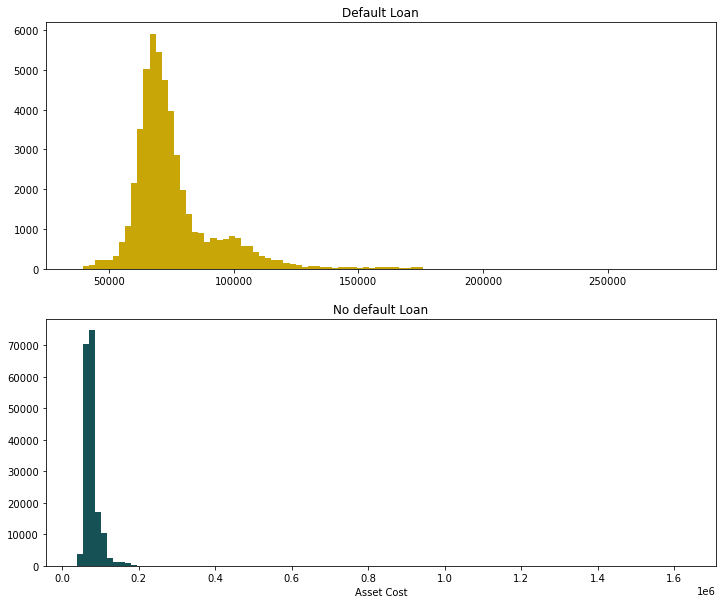

In [17]:
figure,(axis_one, axis_two) = plt.subplots(2, figsize=(12,10))
bins = 100
axis_one.hist(train.ASSET_COST[train.LOAN_DEFAULT == 1], bins = bins, color = '#c9a608')
axis_one.set_title('Default Loan')
axis_two.hist(train.ASSET_COST[train.LOAN_DEFAULT == 0], bins = bins, color = '#165156')
axis_two.set_title('No default Loan')
plt.xlabel('Asset Cost')
plt.show()

count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: ASSET_COST, dtype: float64

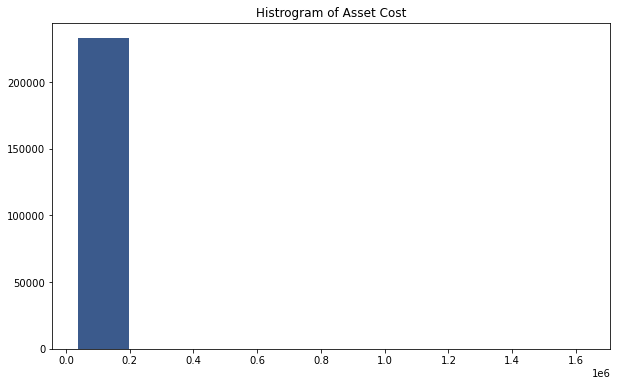

In [18]:
plt.figure(figsize=(10,6))
plt.title("Histrogram of Asset Cost")
hist_DA = plt.hist(train['ASSET_COST'],color='#3b5a8c')
train['ASSET_COST'].describe()

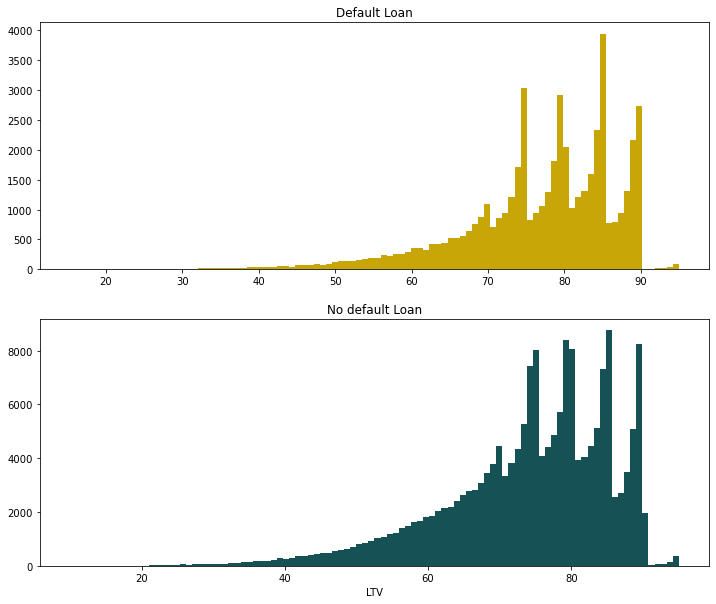

In [19]:
figure,(axis_one, axis_two) = plt.subplots(2, figsize=(12,10))
bins = 100
axis_one.hist(train.LTV[train.LOAN_DEFAULT == 1], bins = bins, color = '#c9a608')
axis_one.set_title('Default Loan')
axis_two.hist(train.LTV[train.LOAN_DEFAULT == 0], bins = bins, color = '#165156')
axis_two.set_title('No default Loan')
plt.xlabel('LTV')
plt.show()

count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: LTV, dtype: float64

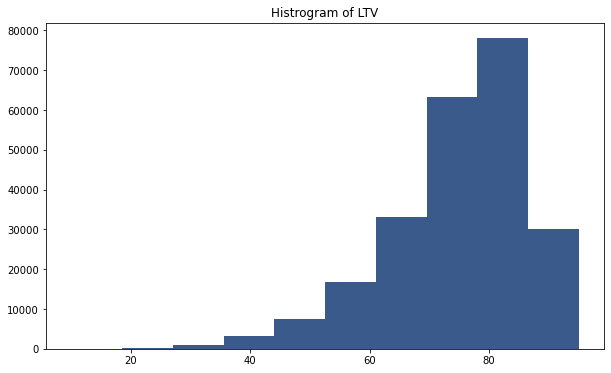

In [20]:
plt.figure(figsize=(10,6))
plt.title("Histrogram of LTV")
hist_DA = plt.hist(train['LTV'],color='#3b5a8c')
train['LTV'].describe()

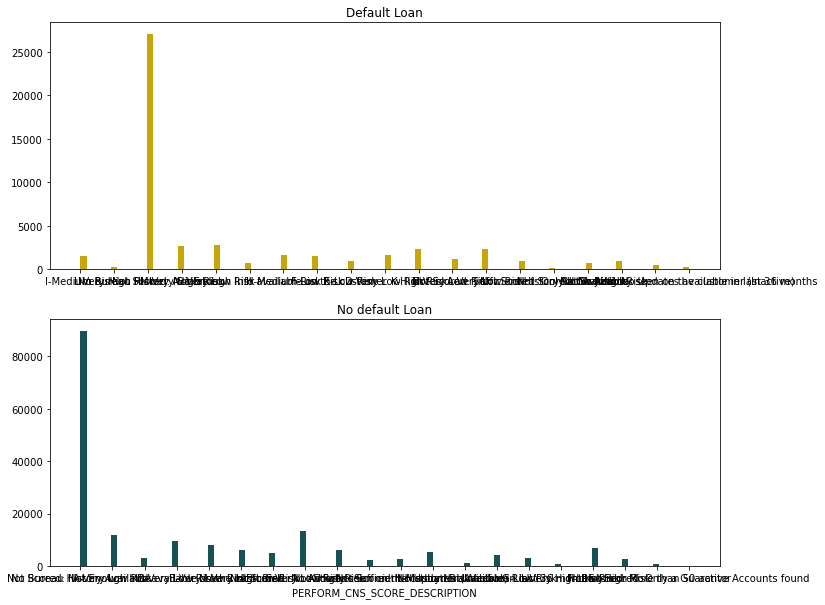

In [21]:
figure,(axis_one, axis_two) = plt.subplots(2, figsize=(12,10))
bins = 100
axis_one.hist(train.PERFORM_CNS_SCORE_DESCRIPTION[train.LOAN_DEFAULT == 1], bins = bins, color = '#c9a608')
axis_one.set_title('Default Loan')
axis_two.hist(train.PERFORM_CNS_SCORE_DESCRIPTION[train.LOAN_DEFAULT == 0], bins = bins, color = '#165156')
axis_two.set_title('No default Loan')
plt.xlabel('PERFORM_CNS_SCORE_DESCRIPTION')
plt.show()

count                          233154
unique                             20
top       No Bureau History Available
freq                           116950
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: object

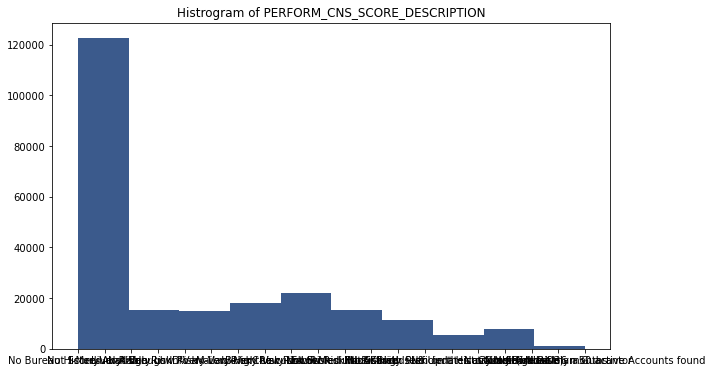

In [22]:
plt.figure(figsize=(10,6))
plt.title("Histrogram of PERFORM_CNS_SCORE_DESCRIPTION")
hist_DA = plt.hist(train['PERFORM_CNS_SCORE_DESCRIPTION'],color='#3b5a8c')
train['PERFORM_CNS_SCORE_DESCRIPTION'].describe()

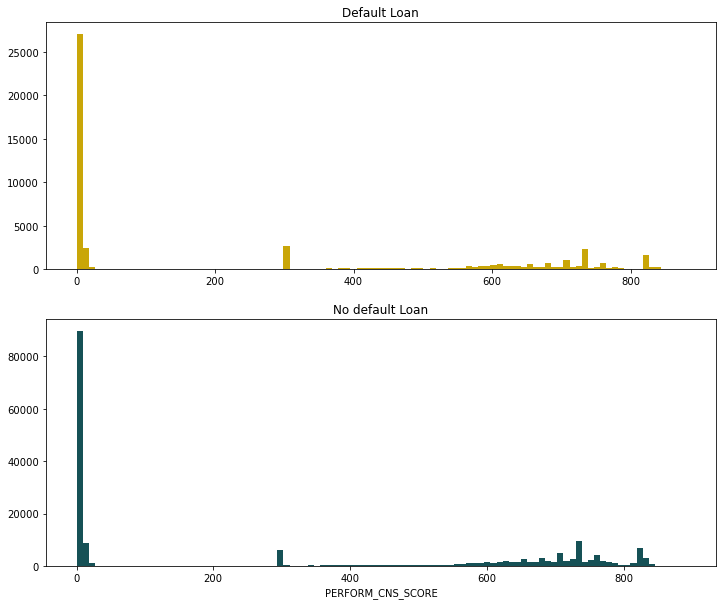

In [23]:
figure,(axis_one, axis_two) = plt.subplots(2, figsize=(12,10))
bins = 100
axis_one.hist(train.PERFORM_CNS_SCORE[train.LOAN_DEFAULT == 1], bins = bins, color = '#c9a608')
axis_one.set_title('Default Loan')
axis_two.hist(train.PERFORM_CNS_SCORE[train.LOAN_DEFAULT == 0], bins = bins, color = '#165156')
axis_two.set_title('No default Loan')
plt.xlabel('PERFORM_CNS_SCORE')
plt.show()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS_SCORE, dtype: float64

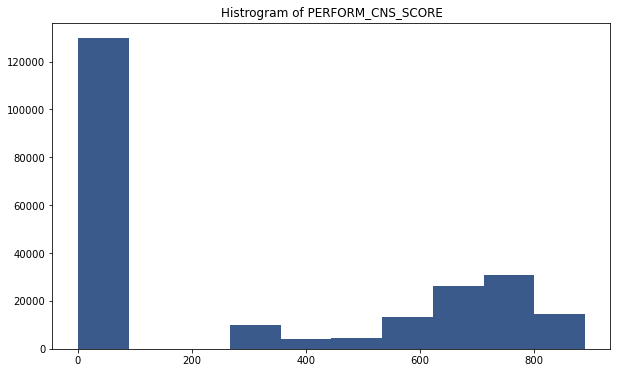

In [24]:
plt.figure(figsize=(10,6))
plt.title("Histrogram of PERFORM_CNS_SCORE")
hist_DA = plt.hist(train['PERFORM_CNS_SCORE'],color='#3b5a8c')
train['PERFORM_CNS_SCORE'].describe()

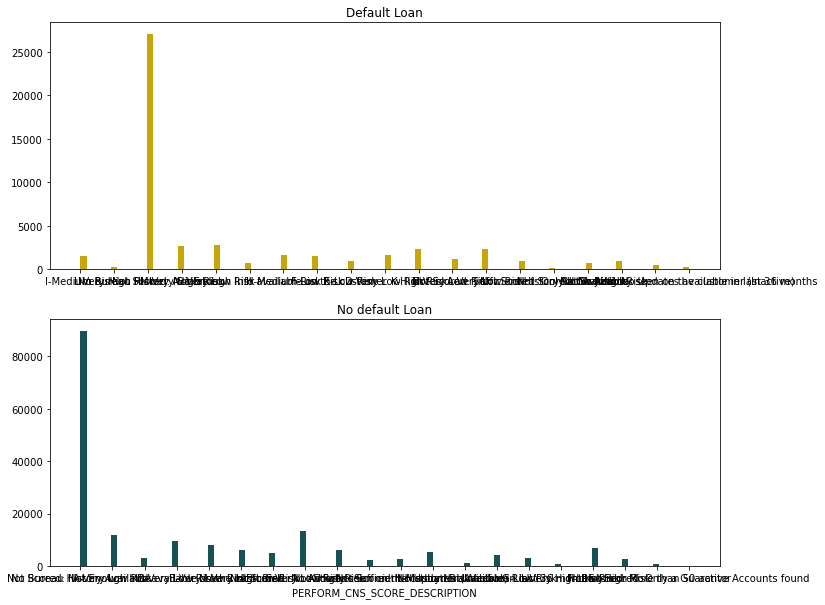

In [25]:
figure,(axis_one, axis_two) = plt.subplots(2, figsize=(12,10))
bins = 100
axis_one.hist(train.PERFORM_CNS_SCORE_DESCRIPTION[train.LOAN_DEFAULT == 1], bins = bins, color = '#c9a608')
axis_one.set_title('Default Loan')
axis_two.hist(train.PERFORM_CNS_SCORE_DESCRIPTION[train.LOAN_DEFAULT == 0], bins = bins, color = '#165156')
axis_two.set_title('No default Loan')
plt.xlabel('PERFORM_CNS_SCORE_DESCRIPTION')
plt.show()

count                          233154
unique                             20
top       No Bureau History Available
freq                           116950
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: object

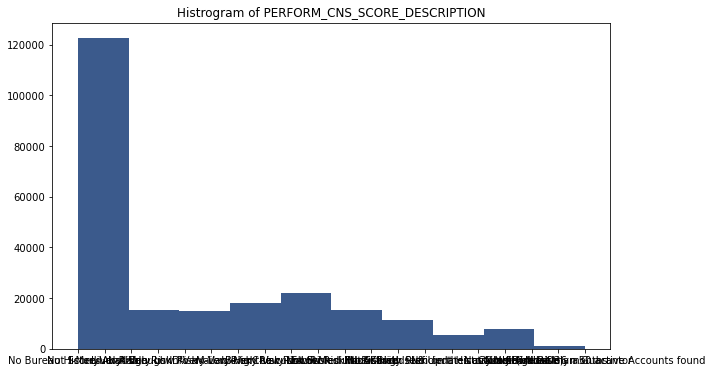

In [26]:
plt.figure(figsize=(10,6))
plt.title("Histrogram of PERFORM_CNS_SCORE_DESCRIPTION")
hist_DA = plt.hist(train['PERFORM_CNS_SCORE_DESCRIPTION'],color='#3b5a8c')
train['PERFORM_CNS_SCORE_DESCRIPTION'].describe()

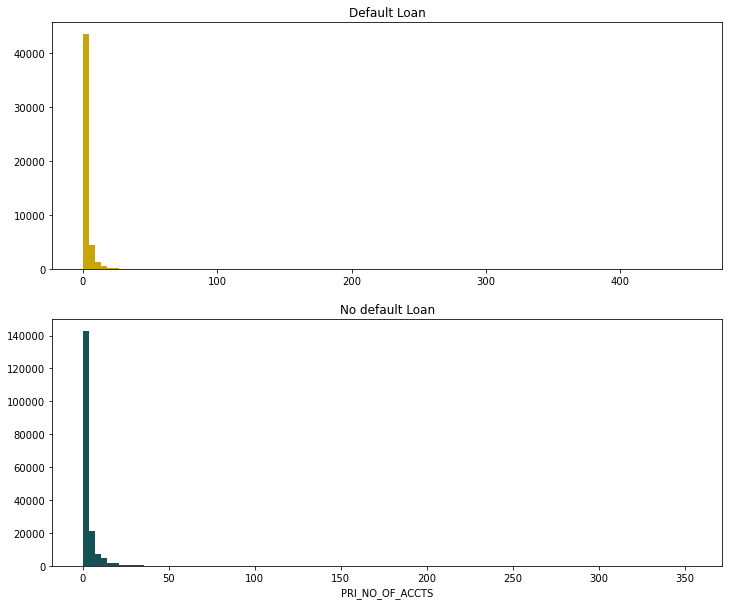

In [27]:
figure,(axis_one, axis_two) = plt.subplots(2, figsize=(12,10))
bins = 100
axis_one.hist(train.PRI_NO_OF_ACCTS[train.LOAN_DEFAULT == 1], bins = bins, color = '#c9a608')
axis_one.set_title('Default Loan')
axis_two.hist(train.PRI_NO_OF_ACCTS[train.LOAN_DEFAULT == 0], bins = bins, color = '#165156')
axis_two.set_title('No default Loan')
plt.xlabel('PRI_NO_OF_ACCTS')
plt.show()

count    233154.000000
mean          2.440636
std           5.217233
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         453.000000
Name: PRI_NO_OF_ACCTS, dtype: float64

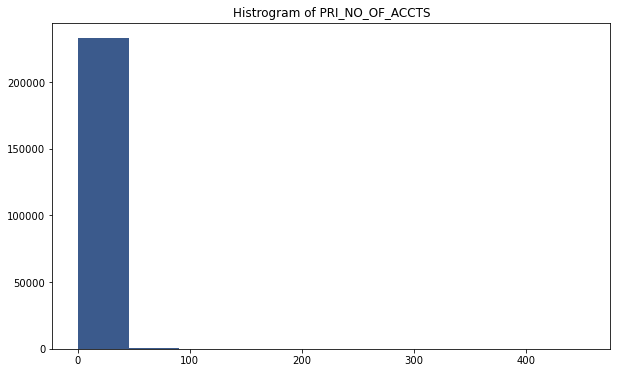

In [28]:
plt.figure(figsize=(10,6))
plt.title("Histrogram of PRI_NO_OF_ACCTS")
hist_DA = plt.hist(train['PRI_NO_OF_ACCTS'],color='#3b5a8c')
train['PRI_NO_OF_ACCTS'].describe()

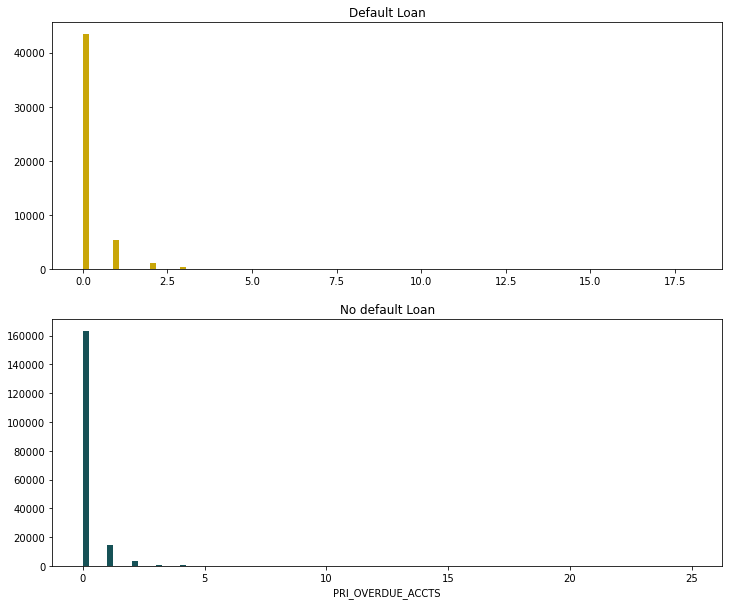

In [29]:
figure,(axis_one, axis_two) = plt.subplots(2, figsize=(12,10))
bins = 100
axis_one.hist(train.PRI_OVERDUE_ACCTS[train.LOAN_DEFAULT == 1], bins = bins, color = '#c9a608')
axis_one.set_title('Default Loan')
axis_two.hist(train.PRI_OVERDUE_ACCTS[train.LOAN_DEFAULT == 0], bins = bins, color = '#165156')
axis_two.set_title('No default Loan')
plt.xlabel('PRI_OVERDUE_ACCTS')
plt.show()

count    233154.000000
mean          0.156549
std           0.548787
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: PRI_OVERDUE_ACCTS, dtype: float64

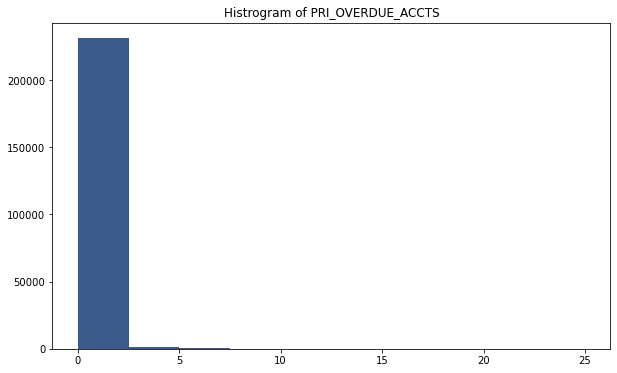

In [30]:
plt.figure(figsize=(10,6))
plt.title("Histrogram of PRI_OVERDUE_ACCTS")
hist_DA = plt.hist(train['PRI_OVERDUE_ACCTS'],color='#3b5a8c')
train['PRI_OVERDUE_ACCTS'].describe()

# Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.


In [31]:
test =   test.drop(['UNIQUEID', 'SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'EMPLOYEE_CODE_ID'], axis = 1)

In [32]:
train = train.drop(['UNIQUEID', 'SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'EMPLOYEE_CODE_ID'], axis = 1)

In [33]:
Y = train.iloc[:, -1] 

In [34]:
Y.shape

(233154,)

In [35]:
X = train.drop(['LOAN_DEFAULT'], axis = 1)

In [36]:
X.shape

(233154, 34)

In [37]:
test_X = test.iloc[:,:]

In [38]:
X.sample(3)

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
186299,53203,78346,69.56,13,86,Self employed,8,1,0,0,...,0,0,0,28977,0,0,0,2yrs 9mon,9yrs 8mon,0
15624,47032,66600,76.13,3,45,Self employed,15,1,1,0,...,0,0,0,0,0,0,1,3yrs 5mon,3yrs 5mon,0
43676,60713,73151,84.07,162,86,Salaried,4,1,1,0,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [39]:
test_X['EMPLOYMENT_TYPE'] = test_X['EMPLOYMENT_TYPE'].replace(('Unemployed', 'Salaried', 'Self employed'), (0, 1, 2))

In [40]:
X['EMPLOYMENT_TYPE'] = X['EMPLOYMENT_TYPE'].replace(('Unemployed', 'Salaried', 'Self employed'), (0, 1, 2))

In [41]:
X['EMPLOYMENT_TYPE'].value_counts() 

2    135296
1     97858
Name: EMPLOYMENT_TYPE, dtype: int64

In [42]:
X['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [43]:
X['PERFORM_CNS_SCORE_DESCRIPTION'] = X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('No Bureau History Available', 
                                     'Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer',
                                     'Not Scored: No Activity seen on the customer (Inactive)', 
                                     'Not Scored: No Updates available in last 36 months', 'Not Scored: Only a Guarantor', 
                                     'Not Scored: More than 50 active Accounts found'),(0, 0, 0, 0, 0, 0, 0))

X['PERFORM_CNS_SCORE_DESCRIPTION'] = X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('L-Very High Risk', 'M-Very High Risk'), (1, 1))

X['PERFORM_CNS_SCORE_DESCRIPTION'] = X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('J-High Risk', 'K-High Risk'), (2, 2))

X['PERFORM_CNS_SCORE_DESCRIPTION'] = X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('H-Medium Risk', 'I-Medium Risk'), (3, 3))

X['PERFORM_CNS_SCORE_DESCRIPTION'] = X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('E-Low Risk', 'F-Low Risk', 'G-Low Risk'), (4, 4, 4))

X['PERFORM_CNS_SCORE_DESCRIPTION'] = X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('A-Very Low Risk', 'B-Very Low Risk',
                                      'C-Very Low Risk', 'D-Very Low Risk'), (5, 5, 5, 5))

In [44]:
X['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

0    129785
5     50728
4     18294
3     12412
2     12025
1      9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

In [45]:
test_X['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                57893
C-Very Low Risk                                             7825
A-Very Low Risk                                             7559
D-Very Low Risk                                             5114
B-Very Low Risk                                             4495
M-Very High Risk                                            4032
K-High Risk                                                 3864
F-Low Risk                                                  3691
H-Medium Risk                                               3287
I-Medium Risk                                               2703
E-Low Risk                                                  2572
G-Low Risk                                                  1807
J-High Risk                                                 1778
Not Scored: No Activity seen on the customer (Inactive)     1361
Not Scored: Not Enough Info available on the customer       1268
Not Scored: Sufficient Hi

In [46]:
test_X['PERFORM_CNS_SCORE_DESCRIPTION'] = test_X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('No Bureau History Available', 
                                     'Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer',
                                     'Not Scored: No Activity seen on the customer (Inactive)', 
                                     'Not Scored: No Updates available in last 36 months', 'Not Scored: Only a Guarantor', 
                                     'Not Scored: More than 50 active Accounts found'),(0, 0, 0, 0, 0, 0, 0))

test_X['PERFORM_CNS_SCORE_DESCRIPTION'] = test_X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('L-Very High Risk', 'M-Very High Risk'), (1, 1))

test_X['PERFORM_CNS_SCORE_DESCRIPTION'] = test_X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('J-High Risk', 'K-High Risk'), (2, 2))

test_X['PERFORM_CNS_SCORE_DESCRIPTION'] = test_X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('H-Medium Risk', 'I-Medium Risk'), (3, 3))

test_X['PERFORM_CNS_SCORE_DESCRIPTION'] = test_X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('E-Low Risk', 'F-Low Risk', 'G-Low Risk'), (4, 4, 4))

test_X['PERFORM_CNS_SCORE_DESCRIPTION'] = test_X['PERFORM_CNS_SCORE_DESCRIPTION'].replace(('A-Very Low Risk', 'B-Very Low Risk',
                                      'C-Very Low Risk', 'D-Very Low Risk'), (5, 5, 5, 5))
 

In [47]:
test_X['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

0    63017
5    24993
4     8070
3     5990
2     5642
1     4680
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

In [48]:
import re
def toMonths(str):
    cache = []
    for k in X[str]:
        temp = int(re.split("[yrs mon]+", k)[0]) * 12 + int(re.split("[yrs mon]+", k)[1])
        cache.append(temp)
    return cache

In [49]:
def toMonthstest(str):
    cache = []
    for k in test_X[str]:
        temp = int(re.split("[yrs mon]+", k)[0]) * 12 + int(re.split("[yrs mon]+", k)[1])
        cache.append(temp)
    return cache

In [50]:
X['CREDIT_HISTORY_LENGTH'] = toMonths('CREDIT_HISTORY_LENGTH')
X['CREDIT_HISTORY_LENGTH'][:5]

0     0
1    23
2     0
3    15
4     0
Name: CREDIT_HISTORY_LENGTH, dtype: int64

In [51]:
X['AVERAGE_ACCT_AGE'] = toMonths('AVERAGE_ACCT_AGE')

In [52]:
X['AVERAGE_ACCT_AGE'][:5]

0     0
1    23
2     0
3     8
4     0
Name: AVERAGE_ACCT_AGE, dtype: int64

In [53]:
test_X['CREDIT_HISTORY_LENGTH'] = toMonthstest('CREDIT_HISTORY_LENGTH')
test_X['AVERAGE_ACCT_AGE'] = toMonthstest('AVERAGE_ACCT_AGE')
test_X['AVERAGE_ACCT_AGE'][0:5]

0     0
1     8
2     0
3    29
4     0
Name: AVERAGE_ACCT_AGE, dtype: int64

# Modeling

In [54]:
from imblearn.over_sampling import SMOTE

In [56]:
x_train, y_train = SMOTE().fit_sample(X, Y.values.ravel())

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [58]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.transform(X_valid)
test_X = scalar.transform(test_X)

In [60]:
train_dummy = pd.get_dummies(X, prefix_sep='_', drop_first=True)
train_dummy.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
0,50578,58400,89.55,67,45,1,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,67,45,2,6,1,1,0,...,0,0,0,1991,0,0,1,23,23,0
2,53278,61360,89.63,67,45,2,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,67,45,2,6,1,1,0,...,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.39,67,45,2,6,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# Logistic Regression 

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [61]:
from sklearn.linear_model import LogisticRegression
import warnings
logmodel = LogisticRegression() 
logmodel.fit(X_train, Y_train)
logpred = logmodel.predict(X_valid)

print("Train Accuracy: ", logmodel.score(X_train, Y_train))
print("Validation Accuracy: ", logmodel.score(X_valid, Y_valid))

Train Accuracy:  0.7822145258225527
Validation Accuracy:  0.7847354763998199


# Random Forest 

Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

Working of Random Forest Algorithm
We can understand the working of Random Forest algorithm with the help of following steps −
Step 1 − First, start with the selection of random samples from a given dataset.
Step 2 − Next, this algorithm will construct a decision tree for every sample. Then it will get the prediction result from every decision tree.
Step 3 − In this step, voting will be performed for every predicted result.
Step 4 − At last, select the most voted prediction result as the final prediction result.


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

modelRF = RandomForestClassifier()
modelRF.fit(X_train, Y_train)

Y_predRF = modelRF.predict(X_valid)

print("Train Accuracy: ", modelRF.score(X_train, Y_train))
print("Validation Accuracy: ", modelRF.score(X_valid, Y_valid))

print("AUROC Score of Random Forest = ", roc_auc_score(Y_valid, Y_predRF))

Train Accuracy:  0.9951051612937815
Validation Accuracy:  0.7720186142265875
AUROC Score of Random Forest =  0.5178668650904759


# ADABoost Classifier

AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique that is used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances. Boosting is used to reduce bias as well as the variance for supervised learning. It works on the principle where learners are grown sequentially. Except for the first, each subsequent learner is grown from previously grown learners. In simple words, weak learners are converted into strong ones. Adaboost algorithm also works on the same principle as boosting, but there is a slight difference in working.

In [64]:
from sklearn.ensemble import AdaBoostClassifier

modelAB = AdaBoostClassifier()
modelAB.fit(X_train, Y_train)

Y_predAB = modelAB.predict(X_valid)

print("Train Accuracy: ", modelAB.score(X_train, Y_train))
print("Validation Accuracy: ", modelAB.score(X_valid, Y_valid))

print("AUROC Score of AdaBoost = ", roc_auc_score(Y_valid, Y_predAB))

Train Accuracy:  0.7821769969387153
Validation Accuracy:  0.7846282515922884
AUROC Score of AdaBoost =  0.5025094186444469


# Gradient Boosting

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. The gradient boosting algorithm (gbm) can be most easily explained by first introducing the AdaBoost Algorithm.The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data.
Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees).

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, Y_train)

Y_predGB = modelGB.predict(X_valid)

print("Training Accuracy: ", modelGB.score(X_train, Y_train))
print('Testing Accuarcy: ', modelGB.score(X_valid, Y_valid))

print("AUROC Score of Gradient Boosting = ", roc_auc_score(Y_valid, Y_predGB))

Training Accuracy:  0.7828310717713097
Testing Accuarcy:  0.7853573802835024
AUROC Score of Gradient Boosting =  0.5013783186270564


# Decision Tree 

A decision tree is a map of the possible outcomes of a series of related choices. It allows an individual or organization to weigh possible actions against one another based on their costs, probabilities, and benefits. They can can be used either to drive informal discussion or to map out an algorithm that predicts the best choice mathematically.
A decision tree typically starts with a single node, which branches into possible outcomes. Each of those outcomes leads to additional nodes, which branch off into other possibilities. This gives it a treelike shape.
There are three different types of nodes: chance nodes, decision nodes, and end nodes. A chance node, represented by a circle, shows the probabilities of certain results. A decision node, represented by a square, shows a decision to be made, and an end node shows the final outcome of a decision path.


In [74]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, Y_train)
model_dtree_pred = dtree.predict(X_valid)

print("Training Accuracy: ", format(dtree.score(X_train, Y_train),'.2f'))
print('Testing Accuarcy: ', format(dtree.score(X_valid, Y_valid),'.2f'))

print("AUROC Score of Decision Tree = ", format(roc_auc_score(Y_valid, Y_predGB),'.2f'))


Training Accuracy:  0.78
Testing Accuarcy:  0.78
AUROC Score of Decision Tree =  0.50


In [69]:
test_Y_RF = modelRF.predict(test_X)
test_Y_AB = modelAB.predict(test_X)
test_Y_GB = modelGB.predict(test_X)

# Summary

We analyze, using correlations, how different fields (loan info and loanee info) correlate to a loanee defaulting his/her loan or not. We analyze using graphs, whether the demographic data plays a major role in a loanee defaulting his/her loan or the financial data. We perfrom different classification models but in the end Random Forest Classifier score (0.99) the best training results.



